In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
47h 40m      1
33h 20m      1
27h 55m      1
35h 35m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

In [8]:
df.shape

(10683, 11)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.shape

(10682, 11)

# EDA PART:

In [12]:
# Convert date and month into datetime method
df['Journey_day']=pd.to_datetime(df['Date_of_Journey'] ,format="%d/%m/%Y").dt.day

In [13]:
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [14]:
df['Journey_Year']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [15]:
df['Journey_Weekdays']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.weekofyear

<ipython-input-15-17ad48b124fc>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Journey_Weekdays']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.weekofyear


In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,12
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,18
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,23
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,19
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,9


In [17]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [20]:
# Departure time is when a plane leaves the gate
# Similarly we have to extract the Dep_hour into hours and minutes

# Extracting Hours:

df['Dep_hours']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes:

df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [21]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,12,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,18,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,23,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,19,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,9,16,50


In [23]:
# Arrival time is when the plane pulls up to the gate
# similar of date of journey we can extract the hours and minutes:

# Extracting the hours:

df['Arrival_hours']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting the minutes:

df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [24]:
# we can drop the Arrival time from the data:

df.drop(['Arrival_Time'],axis=1,inplace = True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,12,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,18,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,23,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,19,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,9,16,50,21,35


In [27]:
len("4h 45m".split())

2

In [33]:
int("4h 45m".split(sep="m")[0].split()[-1])

45

In [37]:
# Time taken to reach the destinations:

lst=list(df['Duration'])

for i in range(len(lst)):
    if len(lst[i].split()) !=2: # check if the duration only hours or mins
        if "h" in lst[i]:
            lst[i]=lst[i].strip() + " 0m" # add 0 minites
        else:
            lst[i]= "0h " + lst[i] # add 0 hours
duration_hours=[]
duration_mins=[]
for i in range(len(lst)):
    duration_hours.append(int(lst[i].split(sep="h")[0])) # Extract the hours only
    duration_mins.append(int(lst[i].split(sep="m")[0].split()[-1]))

In [39]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [40]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,18,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,23,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,19,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,9,16,50,21,35,4,45


In [41]:
df.drop(['Duration'],axis=1,inplace=True)

In [42]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,18,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,23,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,19,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,9,16,50,21,35,4,45


# Handling Categorical Data

1.Nominal Data == data are not in any order --> one hot encoding is used


2.Ordinal Data == data are in order --> Label Encoding is used 

In [43]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

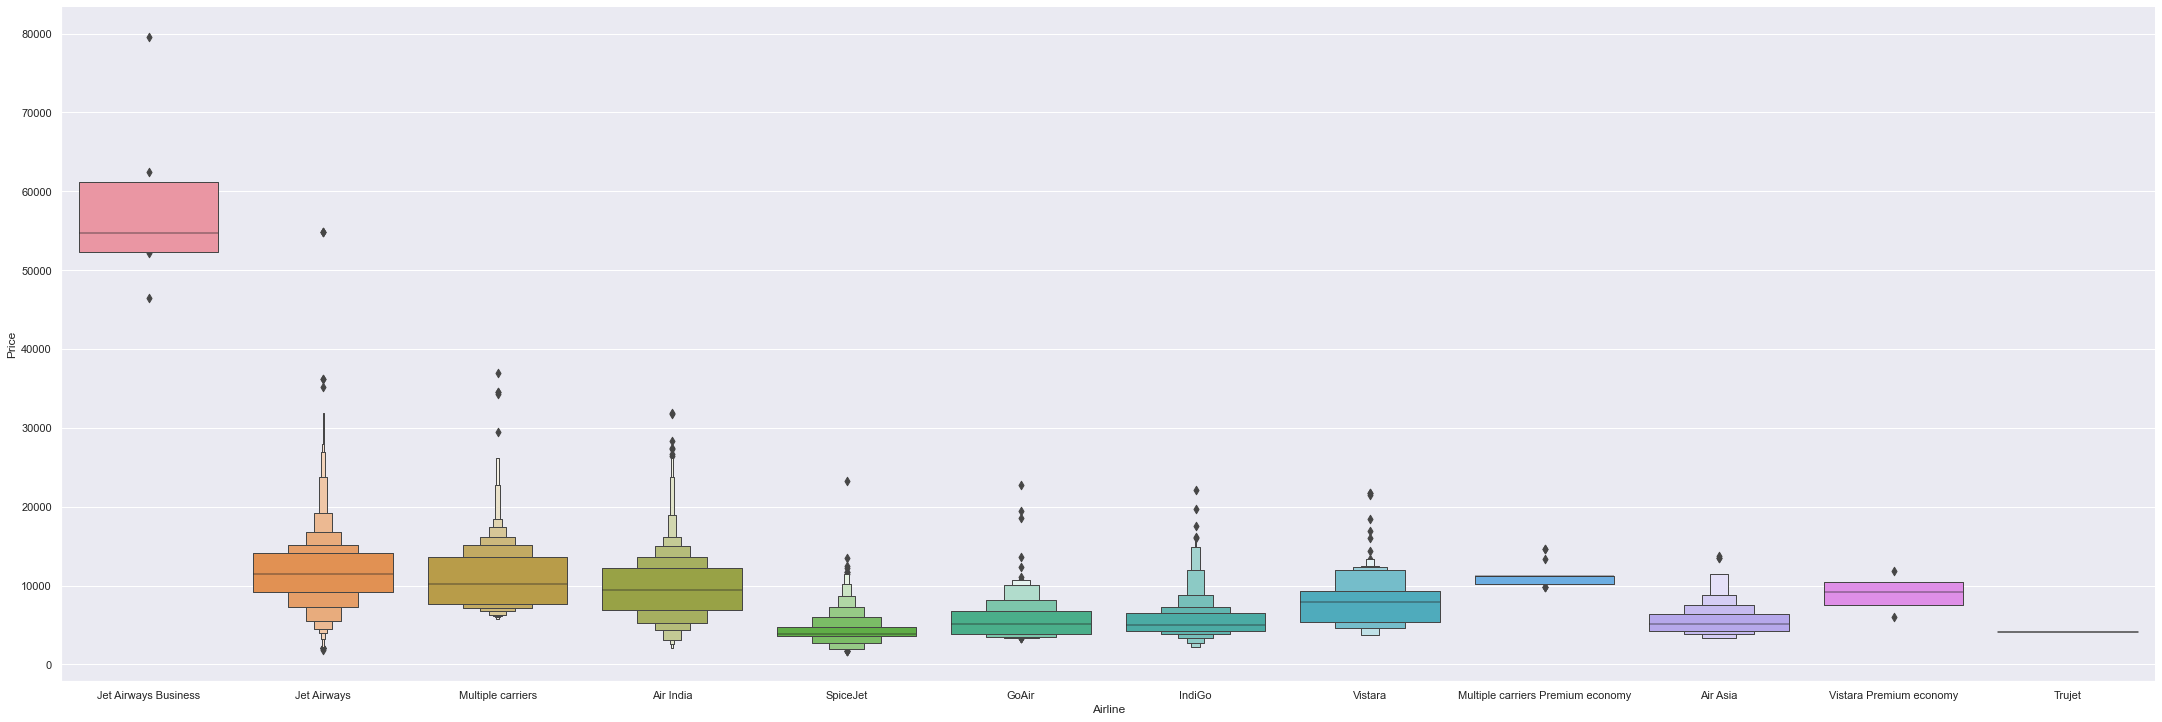

In [46]:
## Airline vs Price:

sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='boxen',height=10,aspect=3,dodge=True)
plt.show()

In [47]:
# As Airline is nominal Categorical data we will perform OneHotencoding:

Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

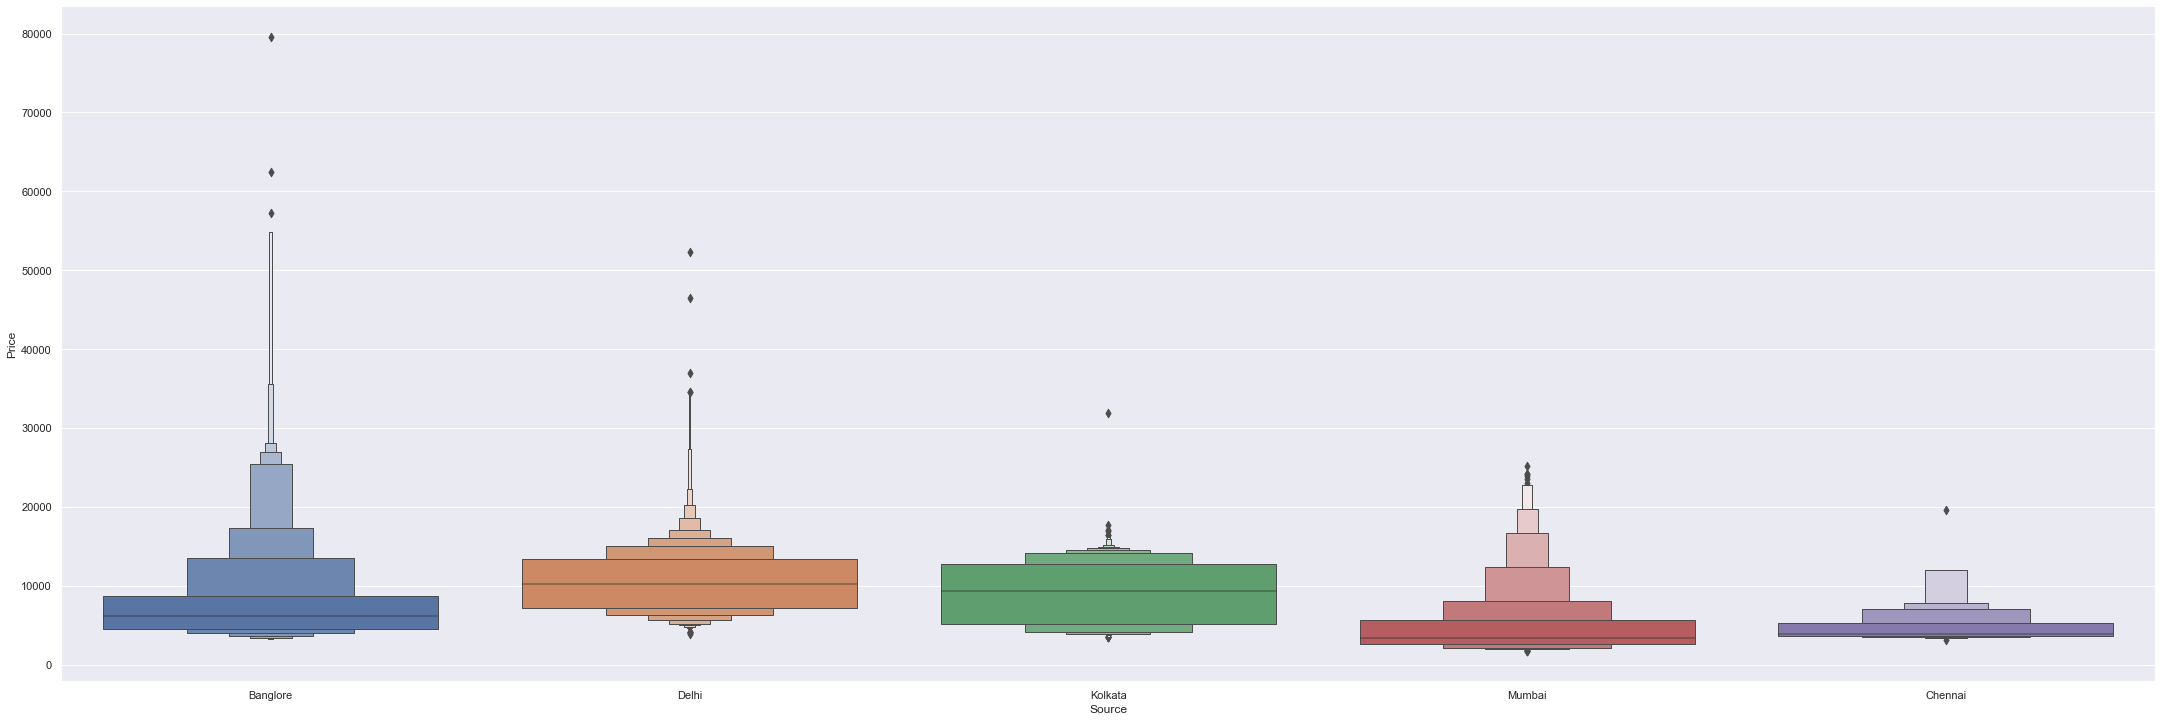

In [50]:
## Plotting the Source vs Price:

sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen',height=10,aspect=3)

In [52]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [53]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [54]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [55]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [56]:
# Additional info contains 80% no_info catagory
# route and Total_stops are related to each other

df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [57]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,18,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,23,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,19,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,9,16,50,21,35,4,45


In [58]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [61]:
# In this case Ordinal Categorical type we perform LabelEncoding 
# here values are assigned with corresponding keys:

df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [62]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,18,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,23,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,19,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,9,16,50,21,35,4,45


In [63]:
## Concatenate the dataframes like df, Source, destination,Airlines:

df_train=pd.concat([df,Airline,Source,Destination],axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,12,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,18,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,23,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,19,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,9,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [65]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,12,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,18,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,23,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,19,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,9,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
df_train.shape

(10682, 32)

In [68]:
df1=pd.read_excel('Test_set.xlsx')

In [69]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [70]:
df1.shape

(2671, 10)

# EDA Part for test data

In [71]:
df1['Journey_month']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [89]:
df1['Journey_day']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [73]:
df1['Journey_Year']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [74]:
df1['Journey_Week']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.weekofyear

<ipython-input-74-33a65d3e58fd>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['Journey_Week']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.weekofyear


In [75]:
# Extracting Hours:

df1['Dep_hours']=pd.to_datetime(df1['Dep_Time']).dt.hour

# Extracting Minutes:

df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute

In [77]:
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [78]:
# Extracting Hours for Arrival time

df1['Arrival_hours']=pd.to_datetime(df1['Arrival_Time']).dt.hour

# Extracting Minutes:

df1['Arrival_min']=pd.to_datetime(df1['Arrival_Time']).dt.minute

In [79]:
df1.drop(['Arrival_Time'],axis=1,inplace=True)

In [81]:
## Extractin the Destination time and hours:

duration=list(df1['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0])) # Extract the hours only
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1])) # extract the mins

In [82]:
df1['Duration_hours']=duration_hours
df1['Duration_mins']=duration_mins

In [83]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Journey_Year,Journey_Week,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,2019-06-06,2019,23,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,2019-05-12,2019,19,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,2019-05-21,2019,21,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,2019-05-21,2019,21,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,2019-06-24,2019,26,23,55,2,45,2,50


In [84]:
df1.drop(['Duration'],axis=1,inplace=True)

# Handling Categorical Data

In [87]:
# As Airline is nominal Categorical data we will perform OneHotencoding:

Airline=df1[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

Source=df1[['Source']]
Source=pd.get_dummies(Source,drop_first=True)


Destination=df1[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)


# Additional info contains 80% no_info catagory
# route and Total_stops are related to each other

df1.drop(['Route','Additional_Info'],axis=1,inplace=True)

# In this case Ordinal Categorical type we perform LabelEncoding 
# here values are assigned with corresponding keys:

df1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [90]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Journey_month,Journey_day,Journey_Year,Journey_Week,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,1,6,6,2019,23,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,1,5,12,2019,19,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,1,5,21,2019,21,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,1,5,21,2019,21,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,0,6,24,2019,26,23,55,2,45,2,50


In [91]:
## Concatenate the dataframes like df, Source, destination,Airlines:

df_test=pd.concat([df1,Airline,Source,Destination],axis=1)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Journey_month,Journey_day,Journey_Year,Journey_Week,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,1,6,6,2019,23,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,1,5,12,2019,19,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,1,5,21,2019,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,1,5,21,2019,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,0,6,24,2019,26,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [92]:
df_test.drop(['Airline','Source','Destination','Date_of_Journey'],axis=1,inplace=True)

In [93]:
df_test.head()

,Total_Stops,Journey_month,Journey_day,Journey_Year,Journey_Week,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,23,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,2019,19,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,5,21,2019,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,21,2019,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,6,24,2019,26,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selections:

Which Contribute have a good relation with target variables:

1. heatmap
2. Feature_importance
3. SelectKBest

In [94]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_Year',
       'Journey_Weekdays', 'Dep_hours', 'Dep_min', 'Arrival_hours',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [96]:
X= df_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Journey_Year',
       'Journey_Weekdays', 'Dep_hours', 'Dep_min', 'Arrival_hours',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_Year,Journey_Weekdays,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,12,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,18,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,23,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,19,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,9,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [97]:
y=df_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

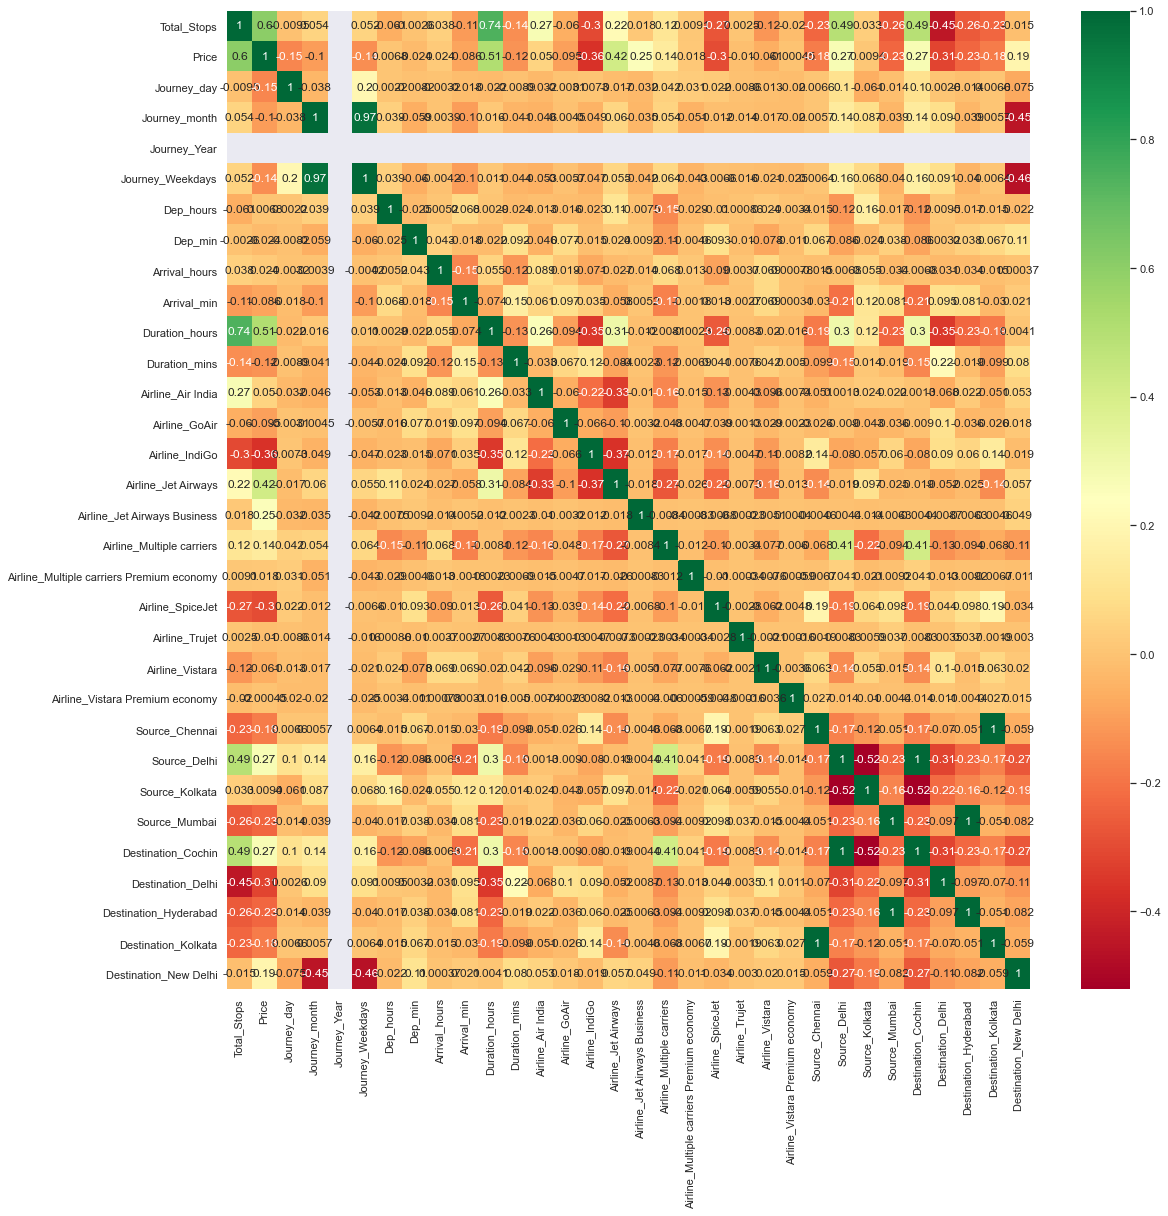

In [101]:
# Finds the correlation between the independent and dependent features:

plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [102]:
## Importance feature using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [103]:
print(selection.feature_importances_)

[2.40682155e-01 7.24605746e-02 2.32903145e-02 0.00000000e+00
 1.09091090e-01 2.40216428e-02 2.04142506e-02 2.70945683e-02
 1.76315062e-02 1.11253481e-01 1.74304543e-02 8.93084979e-03
 1.83579119e-03 1.83151600e-02 1.40163961e-01 6.58513184e-02
 2.01474951e-02 9.42227376e-04 3.25835371e-03 1.07765280e-04
 4.88681851e-03 6.34758140e-05 6.77929345e-04 1.12555521e-02
 4.25124002e-03 5.87979563e-03 9.11312531e-03 1.49954082e-02
 7.04379930e-03 5.67516852e-04 1.83423790e-02]


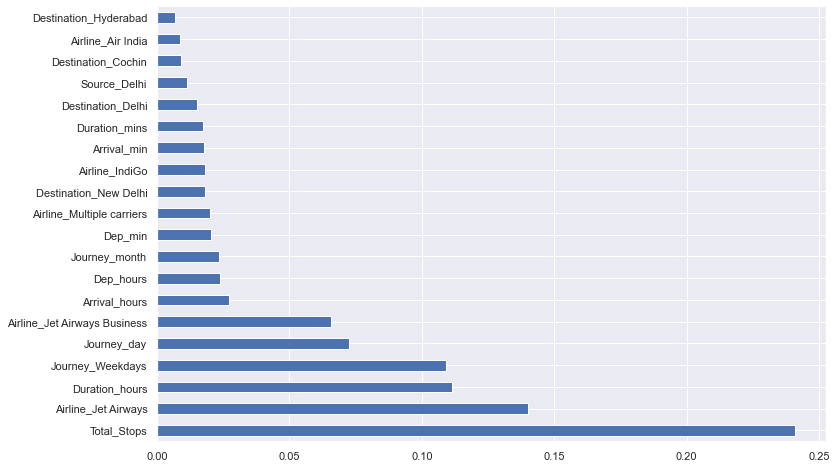

In [104]:
# plotting the importance features:

plt.figure(figsize=(12,8))
feat_import=pd.Series(selection.feature_importances_,index=X.columns)
feat_import.nlargest(20).plot.barh()
plt.show()

# Fitting the Model:

1. Split the dataset into train and test dateset w.r.to X
2. If needed Scaling means done:
    random forest need not Scaling
3. Import model
4. fit the data
5. Check the Metrics
6. plot the graph
7. Save the model

In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [106]:
from sklearn.ensemble import RandomForestRegressor

reg_rf= RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [107]:
y_preds=reg_rf.predict(X_test)
y_preds

array([12444.96474603,  5984.57      ,  3562.03      , ...,
       10022.8       , 11485.2225    ,  3995.68047619])

In [108]:
reg_rf.score(X_train,y_train)

0.9547149994163275

In [109]:
reg_rf.score(X_test,y_test)

0.7994979352382968

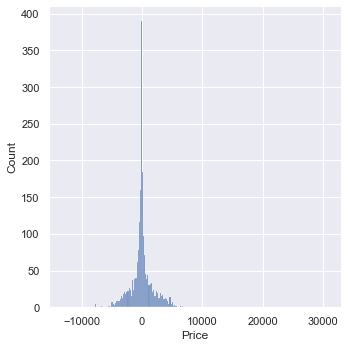

In [110]:
sns.displot(y_test-y_preds)
plt.show()

Text(0.5, 1.0, 'Plot the Y ')

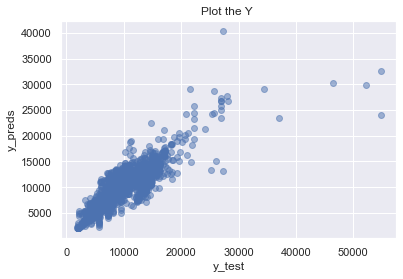

In [111]:
plt.scatter(y_test,y_preds,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_preds")
plt.title("Plot the Y ")

In [112]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [115]:
print("r2_score: ",r2_score(y_test,y_preds))
print("MAE: ", mean_absolute_error(y_test,y_preds))
print("MSE: ", mean_squared_error(y_test,y_preds))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_preds)))

r2_score:  0.7994979352382968
MAE:  1247.382581195841
MSE:  4704415.027038921
RMSE:  2168.9663499093112


# Hyper Parameter Tuning:

1. RandomizedSearchCV -- Fast 

2. GridSearchCV
    
fit the model

In [117]:
# randomizedSearch CV:

from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features= ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split= [2,4,6,8,10,15]
min_samples_leaf=[1,2,5,10]


In [118]:
# Create the Grid parameters:

random_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_split':min_samples_split,
    'max_depth': max_depth,
    'min_samples_leaf':min_samples_leaf
}

In [121]:
# apply the random_grid:

rf=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',
                      n_jobs=1)

In [122]:
rf.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [123]:
rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [124]:
prediction= rf.predict(X_test)

<Figure size 720x576 with 0 Axes>

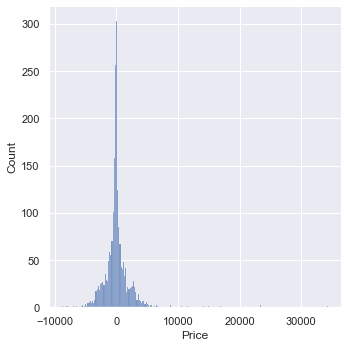

In [125]:
plt.figure(figsize=(10,8))
sns.displot(y_test-prediction)
plt.show()

# Save the model:

In [131]:
import pickle

file=open('flight_rf.pkl','wb')

# dump the data:

pickle.dump(rf,file)

In [132]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [133]:
y_preds=forest.predict(X_test)

In [134]:
r2_score(y_test,y_preds)

0.8142673291720938